# **CLICK THROUGH RATE PREDICTION**




## **Load Dataset**

In [128]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [129]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [130]:
import os
os.chdir('/content/drive/My Drive')

In [131]:
df = pd.read_csv('Clicked Ads Dataset.csv')
df.sample(3)

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
431,431,88.89,35,353076430.0,218.80,Laki-Laki,7/17/2016 18:55,No,Medan,Sumatra Utara,Health
763,763,52.35,25,233056460.0,147.61,Laki-Laki,6/5/2016 7:54,Yes,Medan,Sumatra Utara,Finance
562,562,59.52,44,472583020.0,251.08,Laki-Laki,5/27/2016 18:45,No,Palembang,Sumatra Selatan,Travel


The dataset utilised is from an Indonesian company, therefore the column "Male" translates to "gender". 'Perempuan' means 'Male' and 'Laki-Laki'	means 'female'

## **Exploratory Data Analysis**

In [132]:
df.shape

(1000, 11)

In [133]:
# overview
list_item = []
for col in df.columns:
    list_item.append([col, df[col].dtype, df[col].isna().sum(), round(100*df[col].isna().sum()/len(df[col]), 2), df[col].nunique(), df[col].unique()[:10]])
desc_df = pd.DataFrame(data=list_item, columns='feature, data_type, null_values, null_percentage, unique_values, unique_sample'.split(","))
desc_df

,feature,data_type,null_values,null_percentage,unique_values,unique_sample
0,Unnamed: 0,int64,0,0.0,1000,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]"
1,Daily Time Spent on Site,float64,13,1.3,890,"[68.95, 80.23, 69.47, 74.15, 68.37, 59.99, 88...."
2,Age,int64,0,0.0,43,"[35, 31, 26, 29, 23, 33, 48, 30, 20, 49]"
3,Area Income,float64,13,1.3,987,"[432837300.0, 479092950.00000006, 418501580.0,..."
4,Daily Internet Usage,float64,11,1.1,955,"[256.09, 193.77, 236.5, 245.89, 225.58, 226.74..."
5,Male,object,3,0.3,2,"[Perempuan, Laki-Laki, nan]"
6,Timestamp,object,0,0.0,997,"[3/27/2016 0:53, 4/4/2016 1:39, 3/13/2016 20:3..."
7,Clicked on Ad,object,0,0.0,2,"[No, Yes]"
8,city,object,0,0.0,30,"[Jakarta Timur, Denpasar, Surabaya, Batam, Med..."
9,province,object,0,0.0,16,"[Daerah Khusus Ibukota Jakarta, Bali, Jawa Tim..."


In [134]:
df.duplicated().sum()

0

In [135]:
#numerical features
nums = df.loc[:, (df.dtypes == 'int64') | (df.dtypes == float)].columns.tolist()
nums

['Unnamed: 0',
 'Daily Time Spent on Site',
 'Age',
 'Area Income',
 'Daily Internet Usage']

In [136]:
#categorical features
cats = df.loc[:, (df.dtypes == 'object')].columns.tolist()
cats

['Male', 'Timestamp', 'Clicked on Ad', 'city', 'province', 'category']

* The dataset consists of 1000 rows and 11 features, with 5 numerical features and 6 categorical features.
* There are missing values in the features Daily Time Spent on Site, Area Income, Daily Internet Usage, and Male.
* There are no duplicate data entries.
*Timestamp is recommended to be represented using the datetime data type or can be extracted.

In [137]:
df[nums].describe().round(0).T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1000.0,500.0,289.0,0.0,250.0,500.0,749.0,999.0
Daily Time Spent on Site,987.0,65.0,16.0,33.0,51.0,68.0,78.0,91.0
Age,1000.0,36.0,9.0,19.0,29.0,35.0,42.0,61.0
Area Income,987.0,384864671.0,94079990.0,97975500.0,328632990.0,399068320.0,458355450.0,556393600.0
Daily Internet Usage,989.0,180.0,44.0,105.0,139.0,183.0,219.0,267.0


* Based on the values of mean and median, which are not very far apart, the data distribution tends to approach normal.
* The majority of users spend 68 minutes (1 hour) on a website.
* The majority of daily internet usage for users is 183 minutes (3 hours).
* The majority of users' income is Rp399,068.320 per year. (approx 19,95,341.60 INR OR $28,504.88 US dollars)
* The age range of users is 19 to 61 years, with the majority being 35 years old.

In [138]:
df[cats].describe().T

,count,unique,top,freq
Male,997,2,Perempuan,518
Timestamp,1000,997,5/26/2016 15:40,2
Clicked on Ad,1000,2,No,500
city,1000,30,Surabaya,64
province,1000,16,Daerah Khusus Ibukota Jakarta,253
category,1000,10,Otomotif,112


* The target feature, or Clicked on Ad, has a balanced number of 'Yes' and 'No' values.
* Accuracy is suitable for balanced data. Accuracy measures how often the model makes correct predictions.

**Univariate Analysis**

---



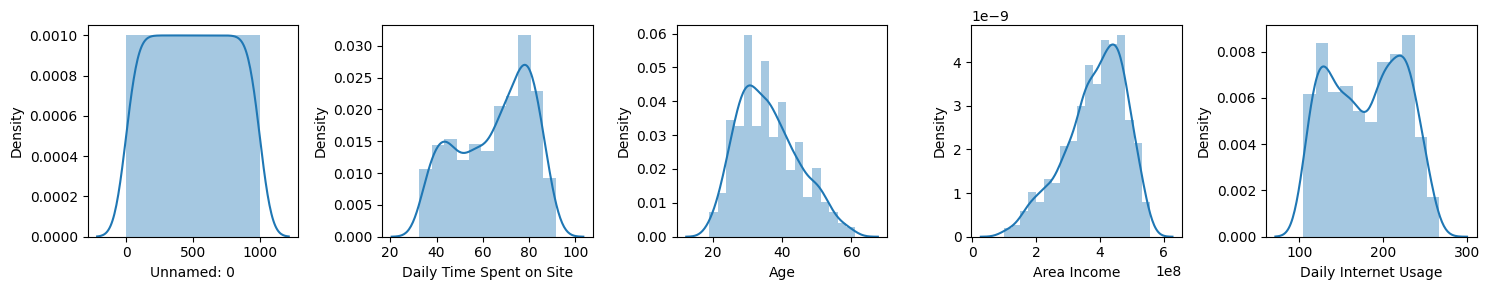

In [139]:
#distribution using displot.
plt.figure(figsize=(15, 3))
for i in range(0, len(nums)):
    plt.subplot(1, 5, i+1)
    sns.distplot(df[nums[i]])
    plt.tight_layout()

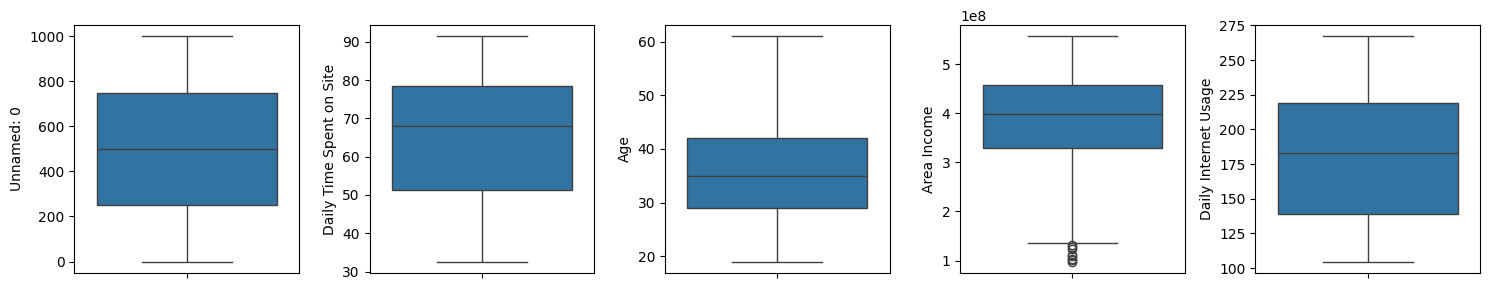

In [140]:
#distribution using boxplot
plt.figure(figsize=(15, 3))
for i in range(0, len(nums)):
    plt.subplot(1, 5, i+1)
    sns.boxplot(df, y=df[nums[i]], orient='v')
    plt.tight_layout()

The feature "Area Income" has outliers, but they can still be tolerated because they are not extreme values.

In [141]:
for col in cats:
    print(f'''Value count column {col}:''')
    print('-' * 50)
    print(df[col].value_counts())
    print()

Value count column Male:
--------------------------------------------------
Male
Perempuan    518
Laki-Laki    479
Name: count, dtype: int64

Value count column Timestamp:
--------------------------------------------------
Timestamp
5/26/2016 15:40    2
5/30/2016 8:02     2
5/20/2016 12:17    2
5/15/2016 3:10     1
4/5/2016 8:18      1
                  ..
5/12/2016 4:35     1
1/1/2016 21:58     1
3/13/2016 13:50    1
7/16/2016 14:13    1
6/3/2016 21:43     1
Name: count, Length: 997, dtype: int64

Value count column Clicked on Ad:
--------------------------------------------------
Clicked on Ad
No     500
Yes    500
Name: count, dtype: int64

Value count column city:
--------------------------------------------------
city
Surabaya             64
Bandung              64
Jakarta Timur        63
Jakarta Selatan      61
Jakarta Barat        57
Bekasi               56
Medan                48
Jakarta Utara        45
Palembang            42
Semarang             41
Batam                34
Mak

**Bivariate Analysis**

---



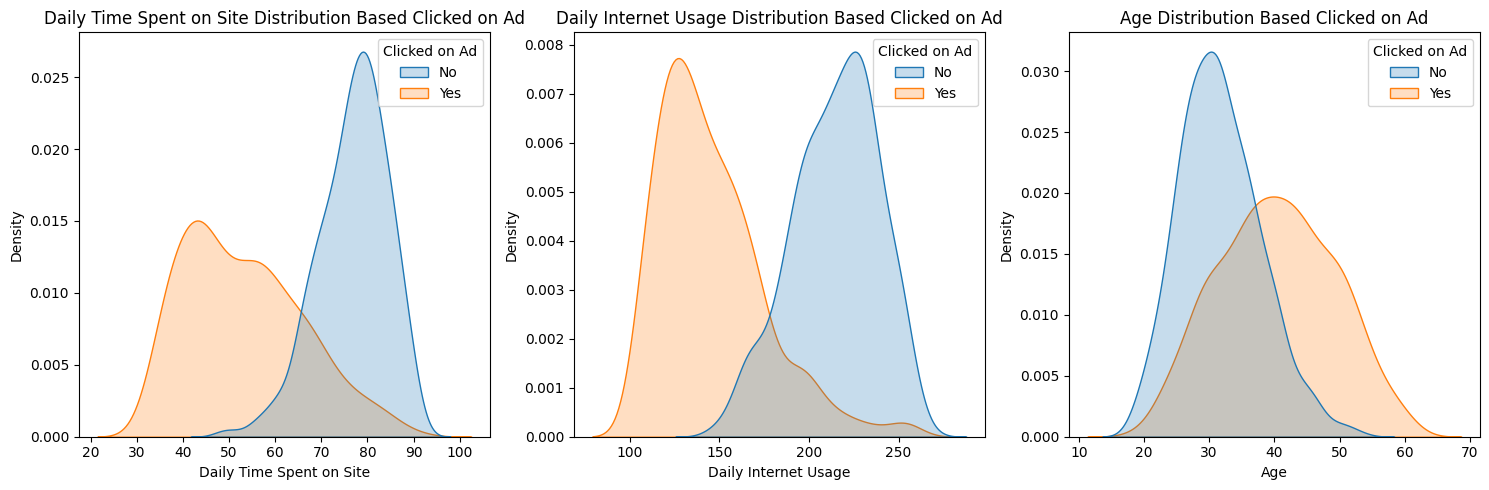

In [142]:
feats = ['Daily Time Spent on Site', 'Daily Internet Usage', 'Age']

plt.figure(figsize=(15, 5))
for i in range(0, len(feats)):
    plt.subplot(1, 3, i+1)
    sns.kdeplot(df, x=df[feats[i]], hue=df['Clicked on Ad'], fill=True).set(title=f'{feats[i]} Distribution Based Clicked on Ad')
    plt.tight_layout()

**Numerical Feature and Click on Ads**

---



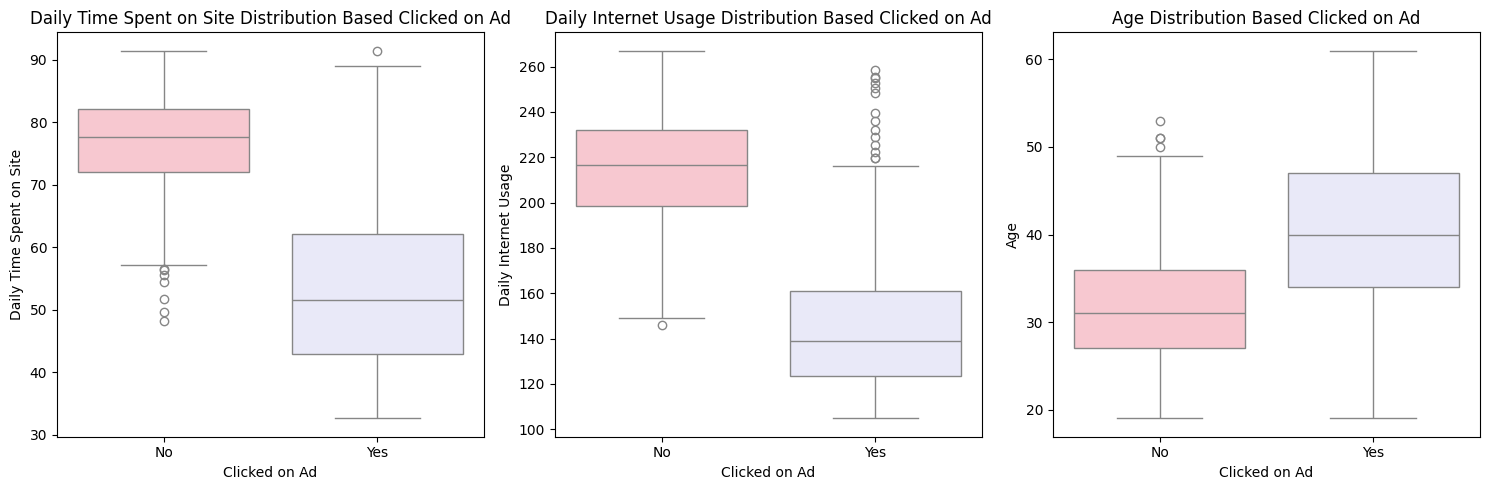

In [143]:
#distribution using boxplot
plt.figure(figsize=(15, 5))
colors = ["pink", "lavender"]
for i in range(0, len(feats)):
    plt.subplot(1, 3, i+1)
    sns.boxplot(df, y=df[feats[i]], x=df['Clicked on Ad'],palette=colors, orient='v').set(title=f'{feats[i]} Distribution Based Clicked on Ad')
    plt.tight_layout()

* Daily Time Spent: Users who spend less time on a website (less than 1 hour) have a higher potential to click on ads.
* Daily Internet Usage:
 * Users who rarely use the internet have a higher potential to click on ads compared to users who frequently use the internet.
 * Users who rarely use the internet may have a greater curiosity about the products or services offered through ads. Users less familiar with the internet may find ads intriguing and seek further product information. Limited internet access may also drive clicks on interesting ads for comprehensive information.
*Age:
 * Older users have a higher potential to click on ads.
 * Younger internet users are more accustomed to technology and the internet, so they may be more capable of finding the information they need through sources other than ads. They may also be more critical in evaluating ads, and prefer to avoid ads that are too intrusive or irrelevant.

**Categorical Feature and Click on Ads**

In [144]:
def ratio_with_target(feats):
    ratio_df = df.groupby([feats,'Clicked on Ad']).agg({'Unnamed: 0' : 'count'}).reset_index()
    ratio_df.columns = [feats,'Clicked on Ad','total']
    ratio_df['ratio'] = ratio_df.groupby(feats).apply(lambda x: round(x.total/x.total.sum() *100, 0)).values.astype(int)
    ratio_df = ratio_df.pivot_table(index=feats, columns='Clicked on Ad', values='ratio')
    ratio_df = ratio_df.sort_values(by=['Yes'], ascending=True)
    return ratio_df

#---------------------------------------------------------------------------------------------------------

# visualise
def cat_visualization(feature, title):
    fig, ax = plt.subplots(1,2, figsize=(15,7))

    # count
    ax[0].set_title(f'Clicked on Ad Distribution by {title}\n', fontsize=14)
    sns.countplot(y=feature, data = df, hue = 'Clicked on Ad', ax=ax[0], palette = ['#1f77b4', '#ff7f0e'],
                 order = df[feature].value_counts().index)
    ax[0].bar_label(ax[0].containers[0], fontsize=11)
    ax[0].bar_label(ax[0].containers[1], fontsize=11)
    ax[0].set_xlabel('')
    ax[0].set_ylabel('')


    #percentage
    ax[1].set_title(f'Pecentage of Clicked on Ad by {title}\n', fontsize=14)
    ratio_with_target(feature).plot(kind='barh', stacked=True, ax=ax[1], color = ['#1f77b4', '#ff7f0e'])
    for p in ax[1].patches:
        left, bottom, width, height = p.get_bbox().bounds
        if width != 0:
            ax[1].annotate((str(round(width, 2))+'%'), xy=(left+width/2, bottom+height/2),
                        ha='center', va='center', fontsize=12)
    plt.legend([])
    ax[1].set_xticks([])
    ax[1].set_xlabel('')
    ax[1].set_ylabel('')

    plt.tight_layout()
    plt.show()

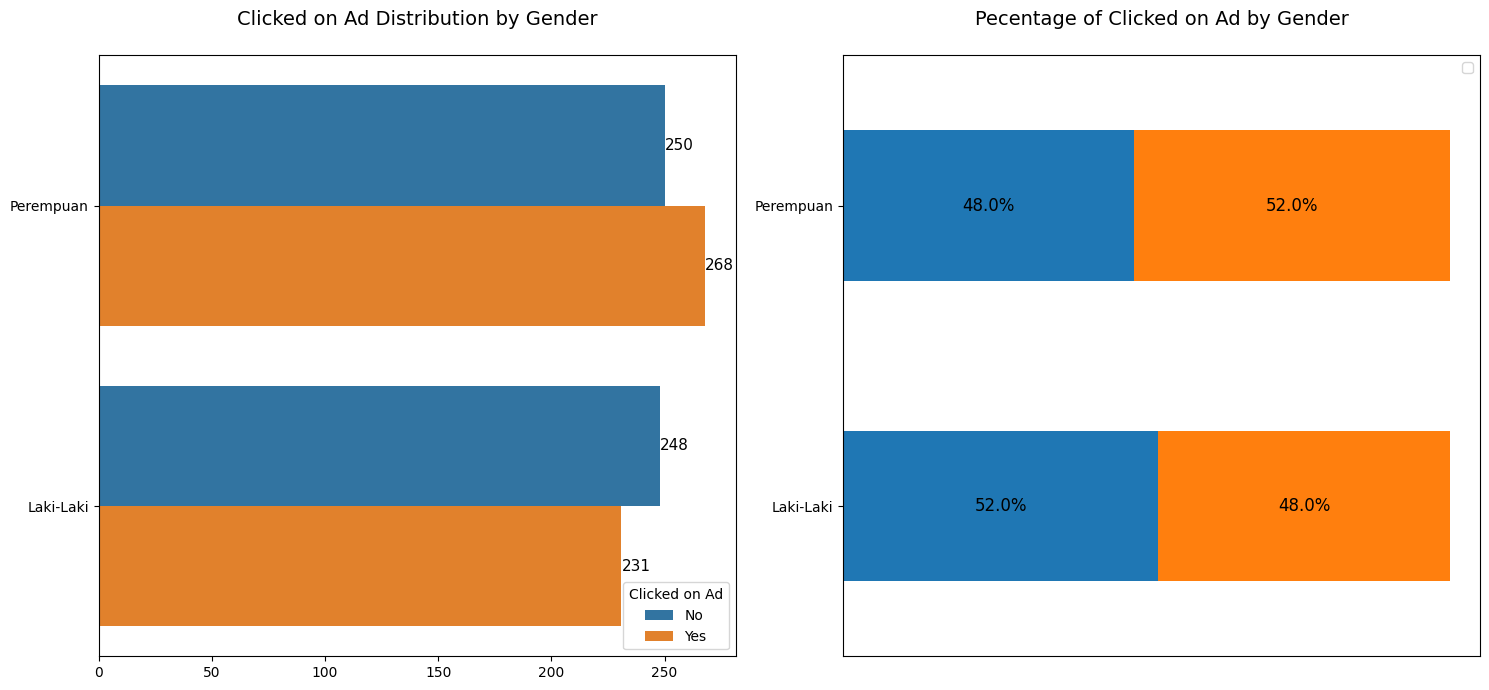

In [145]:
cat_visualization('Male', 'Gender')

In general, the difference in gender regarding ad-click potential is not very significant.

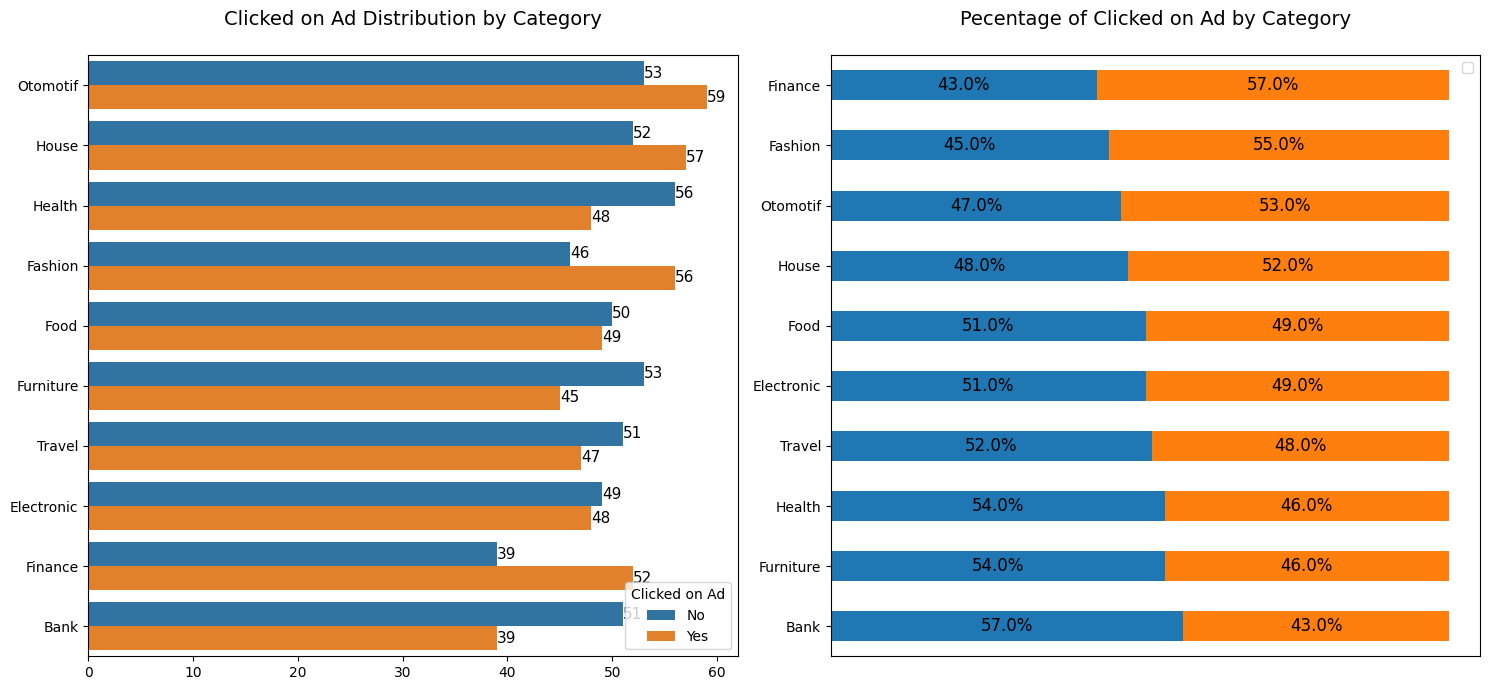

In [146]:

cat_visualization('category', 'Category')

* The types of product ad categories on which the user clicks are not significantly different.
* Categories with the highest click potential are Finance, Fashion, and Automotive(Otomotif).

**Sessions and Click on Ads**

---


Analyzing the potential time for users who click on ads is important because it can provide us valuable insights into user behavior and help companies optimize their marketing strategies.

In [147]:
df1 = df.copy()

In [148]:

df1['Timestamp'] = pd.to_datetime(df1['Timestamp'])

df1['Month'] = df1['Timestamp'].dt.month
df1['Week_day'] = df1['Timestamp'].dt.dayofweek
df1['Hour'] = df1['Timestamp'].dt.hour
df1 = df1.drop(['Timestamp'], axis=1)

**Monthly**

<Axes: xlabel='Month', ylabel='count'>

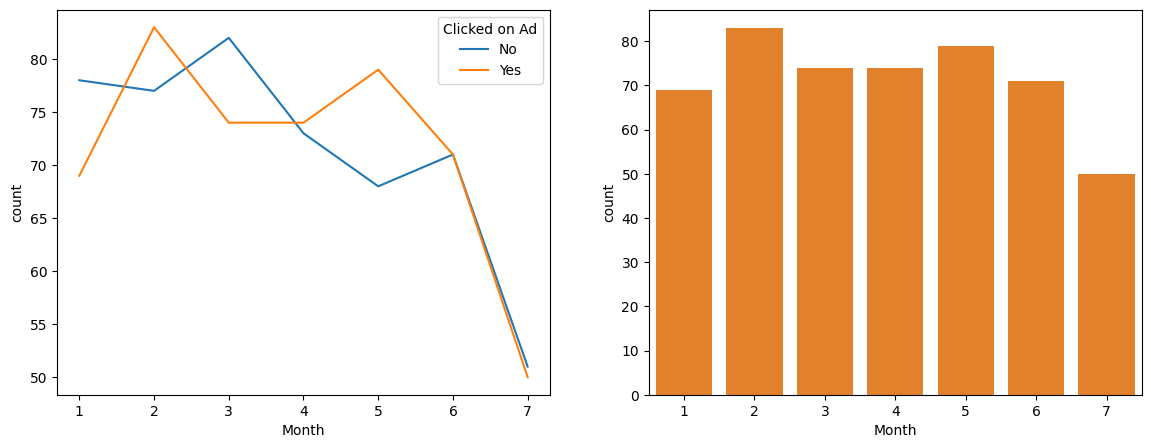

In [149]:

clicked_per_month = df1.groupby(['Month', 'Clicked on Ad'])[['Unnamed: 0']].count()
clicked_per_month.rename(columns={'Unnamed: 0': 'count'}, inplace=True)
clicked_per_month.reset_index()

f,ax=plt.subplots(1,2,figsize=(14,5))
sns.lineplot(x='Month', y='count', hue='Clicked on Ad', data=clicked_per_month, ax = ax[0])
sns.countplot(data=df1[df1['Clicked on Ad'] == 'Yes'], x='Month', color='#ff7f0e', ax = ax[1])

Many users clicked on ads in February and May.

**Days in Week**

<Axes: xlabel='Week_day', ylabel='count'>

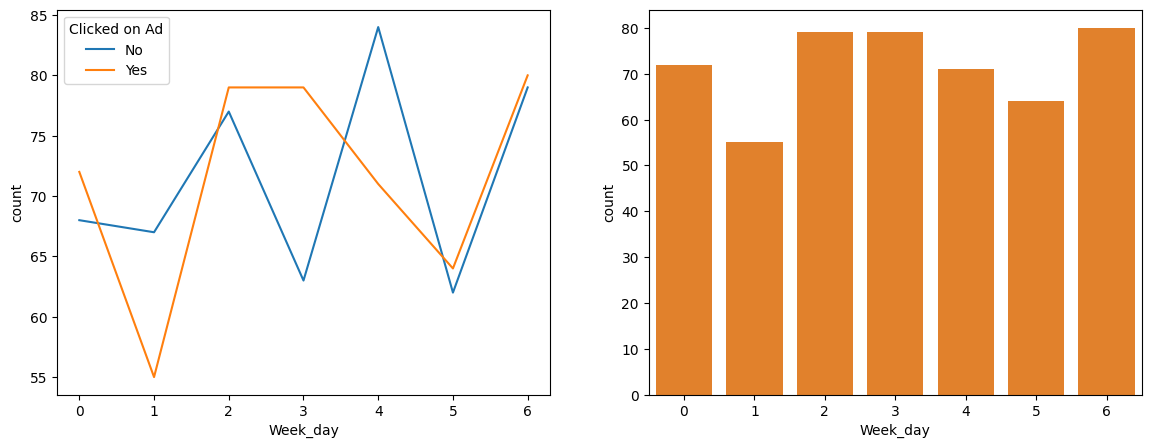

In [150]:
clicked_per_wkday = df1.groupby(['Week_day', 'Clicked on Ad'])[['Unnamed: 0']].count()
clicked_per_wkday.rename(columns={'Unnamed: 0': 'count'}, inplace=True)
clicked_per_wkday.reset_index()

f,ax=plt.subplots(1,2,figsize=(14,5))
sns.lineplot(x='Week_day', y='count', hue='Clicked on Ad', data=clicked_per_wkday, ax = ax[0])
sns.countplot(data=df1[df1['Clicked on Ad'] == 'Yes'], x='Week_day', color='#ff7f0e', ax = ax[1])

Week starts from sunday '0' and ends on saturday '6'

* Very few users clicked on ads on Mondays and Fridays.
* Wednesday,Tuesday and Saturday have the best ad-click conversion, with a high number of users clicking and a low number of users not clicking.
* Mondays and Fridays are often considered the beginning and end of the workweek, where people tend to be busy with work and less focused on online activities such as clicking on ads. In contrast, Wednesday may be the midpoint of the week where people feel more relaxed and have more time to spend online and shop.

**Hourly**

<Axes: xlabel='Hour', ylabel='count'>

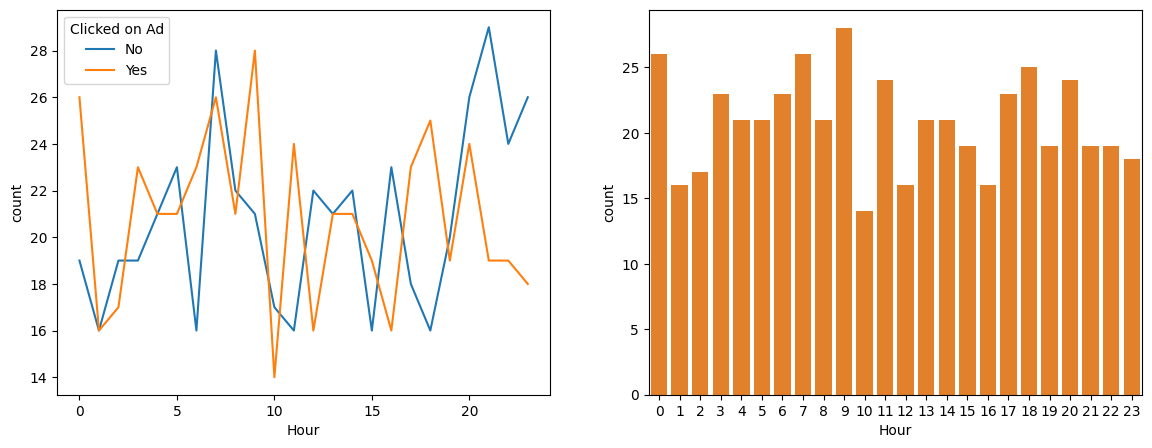

In [151]:
clicked_per_hr = df1.groupby(['Hour', 'Clicked on Ad'])[['Unnamed: 0']].count()
clicked_per_hr.rename(columns={'Unnamed: 0': 'count'}, inplace=True)
clicked_per_hr.reset_index()

f,ax=plt.subplots(1,2,figsize=(14,5))
sns.lineplot(x='Hour', y='count', hue='Clicked on Ad', data=clicked_per_hr, ax = ax[0])
sns.countplot(data=df1[df1['Clicked on Ad'] == 'Yes'], x='Hour', color='#ff7f0e', ax = ax[1])

* The potential for users to click on ads and have high purchase conversions is high at 00:00, 09:00, 11:00, and 18:00.
* The mentioned times may be related to users' habits in using digital devices. At 00:00, people may not have urgent obligations or tasks, so they are more likely to spend time online. 09:00 and 11:00 may be times when people have breaks from work or short rests, while 18:00 is the time after work when they can focus on personal activities.

**Multivariate Analysis**

---



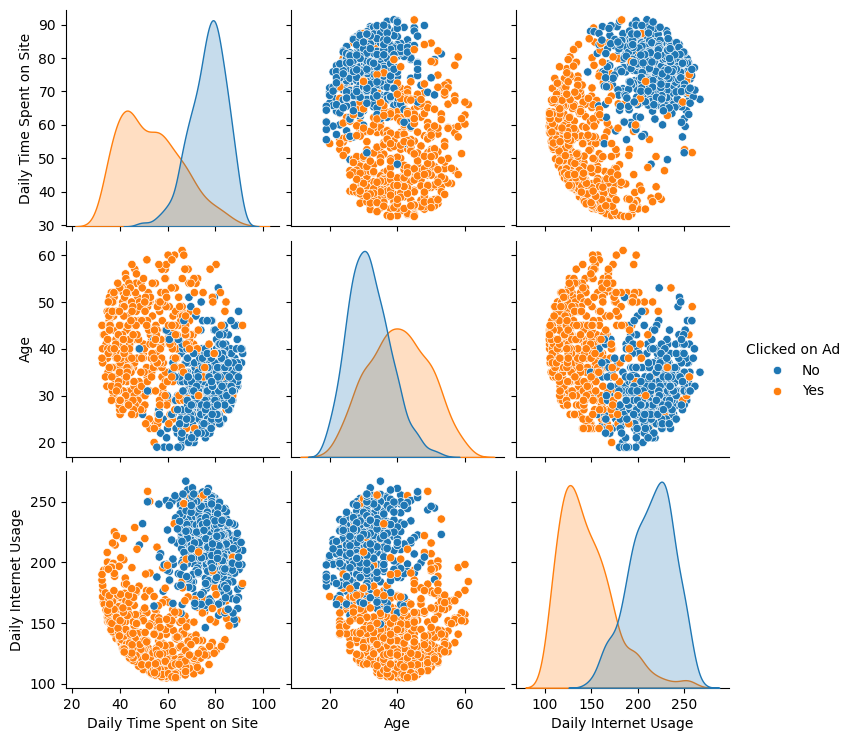

In [152]:
feats = ['Daily Time Spent on Site', 'Age', 'Daily Internet Usage']
sns.pairplot(data=df1, vars=feats, hue='Clicked on Ad')

* From the pairplot visualization of user distribution into two segments, based on Daily Internet Usage and Daily Time Spent on Site, users can be categorized into active and non-active.
* Active users tend to not click on ads much, so companies can target their ads towards non-active users.

## **Data Preprocessing**

**Data Cleaning**

---



In [153]:
df_cleaned = df1

In [154]:
df_cleaned.isnull().sum()

Unnamed: 0                   0
Daily Time Spent on Site    13
Age                          0
Area Income                 13
Daily Internet Usage        11
Male                         3
Clicked on Ad                0
city                         0
province                     0
category                     0
Month                        0
Week_day                     0
Hour                         0
dtype: int64

In [155]:
df_cleaned['Male'].fillna(df_cleaned['Male'].mode()[0], inplace = True)

In [156]:
#Exclude non-numerical columns
numerical_columns = df_cleaned.select_dtypes(include=[np.number]).columns

In [157]:
#Fill missing values with median for numerical columns
df_cleaned[numerical_columns] = df_cleaned[numerical_columns].fillna(df_cleaned[numerical_columns].median())

In [158]:
df_cleaned.isna().sum()

Unnamed: 0                  0
Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Male                        0
Clicked on Ad               0
city                        0
province                    0
category                    0
Month                       0
Week_day                    0
Hour                        0
dtype: int64

**Feature Encoding**

---



* Label Encoding : Male(gender)
* One Hot Encoding : island, category

In [159]:
df_prep = df_cleaned

In [160]:
mapping_gender = {
    'Perempuan' : 0,
    'Laki-Laki' : 1}
df_prep['Male'] = df_prep['Male'].map(mapping_gender)

The 'city' and 'province' features have many unique values. Therefore, it was decided to create a new feature, namely categorization according to the island, to be applied to the model.

In [161]:
df_prep['province'].unique()

array(['Daerah Khusus Ibukota Jakarta', 'Bali', 'Jawa Timur',
       'Kepulauan Riau', 'Sumatra Utara', 'Jawa Barat', 'Lampung',
       'Banten', 'Sumatra Barat', 'Jawa Tengah', 'Sulawesi Selatan',
       'Kalimantan Barat', 'Kalimantan Selatan', 'Sumatra Selatan',
       'Kalimantan Timur', 'Riau'], dtype=object)

In [162]:
df_prep['island'] = np.where((((df_prep['province']) == 'Daerah Khusus Ibukota Jakarta')
                             | ((df_prep['province']) == 'Jawa Timur')
                             | ((df_prep['province']) =='Jawa Barat')
                             | ((df_prep['province']) =='Banten')
                             | ((df_prep['province']) =='Jawa Tengah')), 'Jawa',
                            np.where(((df_prep['province']) == 'Kepulauan Riau')
                                     | ((df_prep['province']) == 'Sumatra Utara')
                                     | ((df_prep['province']) == 'Lampung')
                                     | ((df_prep['province']) == 'Sumatra Barat')
                                     | ((df_prep['province']) == 'Sumatra Selatan'), 'Sumatra',
                                     np.where(((df_prep['province']) == 'Kalimantan Barat')
                                              | ((df_prep['province']) == 'Kalimantan Selatan')
                                              | ((df_prep['province']) == 'Kalimantan Timur')
                                              | ((df_prep['province']) == 'Kalimantan'), 'Kalimantan',
                                              np.where(((df_prep['province']) == 'Bali'), 'Bali',
                                              'Sulawesi'))))

In [163]:
df_prep['island'].value_counts()

island
Jawa          682
Sumatra       172
Kalimantan     69
Sulawesi       56
Bali           21
Name: count, dtype: int64

In [164]:
df_prep = pd.get_dummies(df_prep, columns=['island'])

In [165]:
df_prep = pd.get_dummies(df_prep, columns=['category'])

In [167]:
# Convert boolean columns to integers (True becomes 1, False becomes 0)
bool_columns = df_prep.select_dtypes(include=['bool']).columns
df_prep[bool_columns] = df_prep[bool_columns].astype(int)

In [180]:
mapping_clicked = {
    'No': 0,
    'Yes': 1
}
# Map 'Clicked on Ad' column using the mapping dictionary
df_prep['Clicked on Ad'] = df_prep['Clicked on Ad'].map(mapping_clicked)

In [181]:
print(df_prep['Clicked on Ad'].unique())

[0 1]


In [182]:
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   Daily Time Spent on Site  1000 non-null   float64
 2   Age                       1000 non-null   int64  
 3   Area Income               1000 non-null   float64
 4   Daily Internet Usage      1000 non-null   float64
 5   Male                      1000 non-null   int64  
 6   Clicked on Ad             1000 non-null   int64  
 7   city                      1000 non-null   object 
 8   province                  1000 non-null   object 
 9   Month                     1000 non-null   int32  
 10  Week_day                  1000 non-null   int32  
 11  Hour                      1000 non-null   int32  
 12  island_Bali               1000 non-null   int64  
 13  island_Jawa               1000 non-null   int64  
 14  island_Ka

In [183]:
df_prep.sample(3)

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,city,province,Month,...,category_Bank,category_Electronic,category_Fashion,category_Finance,category_Food,category_Furniture,category_Health,category_House,category_Otomotif,category_Travel
187,187,77.95,31,438010160.0,233.65,1,0,Palembang,Sumatra Selatan,6,...,0,0,0,0,0,0,0,0,0,1
38,38,50.43,46,401981090.0,119.32,1,1,Tangerang,Banten,5,...,0,0,0,0,0,1,0,0,0,0
990,990,35.79,44,236691560.0,165.62,1,1,Padang,Sumatra Barat,4,...,0,0,0,0,1,0,0,0,0,0


**Feature Selection**

---
Removing features that are not used in the model.


In [184]:
df_prep.drop(columns = ['Unnamed: 0', 'city', 'province'], inplace=True)

In [185]:
df_prep.sample(3)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,Month,Week_day,Hour,island_Bali,...,category_Bank,category_Electronic,category_Fashion,category_Finance,category_Food,category_Furniture,category_Health,category_House,category_Otomotif,category_Travel
575,48.86,54,372320830.0,134.46,0,1,1,5,17,0,...,0,0,0,0,0,1,0,0,0,0
785,36.37,40,331372580.0,144.53,1,1,4,4,0,0,...,0,0,0,0,0,0,0,0,0,1
533,91.43,39,328748770.0,209.91,1,0,7,3,3,0,...,0,1,0,0,0,0,0,0,0,0


## **Modeling**

At this stage, we will perform the search and construction of a model with a high level of accuracy. The accuracy matrix is ​​used because the number of categories in the target used is balanced.

In [186]:
df_model = df_prep.copy()

In [187]:
# define X (feature) and y (target)
X = df_model.drop(columns='Clicked on Ad').copy()
y = df_model['Clicked on Ad'].copy()

In [188]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1)

In [189]:
print('Split 70:30')
print('Total rows & column of train set:',X_train.shape)
print('Total rows & column of test set:',X_test.shape)

Split 70:30
Total rows & column of train set: (700, 23)
Total rows & column of test set: (300, 23)


In [190]:
y_train.value_counts()

Clicked on Ad
0    354
1    346
Name: count, dtype: int64

**Define Function**

---



In [198]:
from datetime import datetime as dt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,  GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier

In [201]:
def experiment(X_train, X_test, y_train, y_test):
    models = [
        ('Logistic Regression', LogisticRegression(random_state=1)),
        ('SVC', SVC(random_state=1)),
        ('Random Forest', RandomForestClassifier(random_state=1)),
        ('Gradient Boosting', GradientBoostingClassifier(random_state=1)),
        ('XGBoost', XGBClassifier(random_state=1)),
        ('LGBM', LGBMClassifier(random_state=1))
    ]

    result = []
    for name, model in models:
        start = dt.now()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # evaluation
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        result.append((name, accuracy, precision, recall, f1))

    df_comparison = pd.DataFrame(result, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1'])
    return df_comparison

In [202]:
exp1 = experiment(X_train, X_test, y_train, y_test)
exp1.sort_values(by='Accuracy', ascending=False)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 346, number of negative: 354
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000152 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 812
[LightGBM] [Info] Number of data points in the train set: 700, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.494286 -> initscore=-0.022858
[LightGBM] [Info] Start training from score -0.022858
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

,Model,Accuracy,Precision,Recall,F1
2,Random Forest,0.960000,0.993056,0.928571,0.959732
3,Gradient Boosting,0.953333,0.986111,0.922078,0.953020
4,XGBoost,0.950000,0.979310,0.922078,0.949833
5,LGBM,0.950000,0.986014,0.915584,0.949495
1,SVC,0.686667,0.800000,0.519481,0.629921
0,Logistic Regression,0.486667,0.000000,0.000000,0.000000


* The model result without standardization that has the highest accuracy is Random Forest.
*  Other algorithms with high accuracy include Gradient Boosting, XGBoost, and LGBM, with a value of 95%.
* Logistic Regression and SVM algorithms have very low accuracy, which can result in poor prediction outcomes.

In [203]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [204]:
after_standarization = experiment(X_train_scaled, X_test_scaled, y_train, y_test)
after_standarization.sort_values(by='Accuracy', ascending=False)

[LightGBM] [Info] Number of positive: 346, number of negative: 354
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000318 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 828
[LightGBM] [Info] Number of data points in the train set: 700, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.494286 -> initscore=-0.022858
[LightGBM] [Info] Start training from score -0.022858
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

,Model,Accuracy,Precision,Recall,F1
2,Random Forest,0.960000,0.986301,0.935065,0.960000
4,XGBoost,0.956667,0.979592,0.935065,0.956811
1,SVC,0.953333,0.986111,0.922078,0.953020
3,Gradient Boosting,0.953333,0.979452,0.928571,0.953333
0,Logistic Regression,0.950000,0.972789,0.928571,0.950166
5,LGBM,0.950000,0.979310,0.922078,0.949833


* Model using standardization with the Random Forest algorithm shows the highest accuracy level. Additionally, it's noted that the accuracy value is not significantly different from the before, achieving 96%.
* Accuracy values also do not vary much for XGBoost, Gradient Boosting, and LGBM algorithms.
* For the SVM and Logistic Regression algorithms, accuracy results significantly improve with standardization.

* Several factors could affect why the accuracy values of models using Random Forest, XGBoost, Gradient Boosting, and LightGBM algorithms remain the same when features are standardized and not standardized:
* These models are not highly sensitive to feature scales, meaning differences in feature scales do not significantly affect model performance. Therefore, the use of standardization does not result in significant changes in accuracy values.
* They are robust algorithms with strong capabilities to handle various types of data without the need for complex preprocessing. They can adapt well to non-standardized data.

## **Model Evaluation**

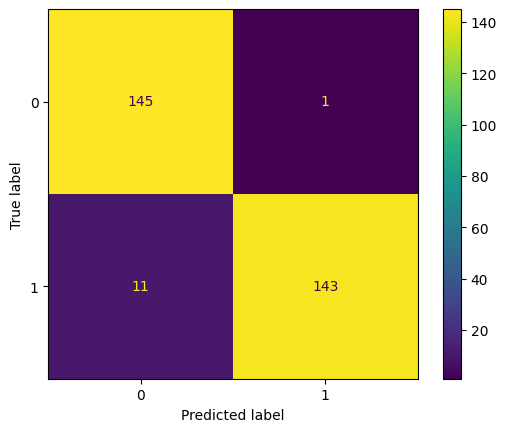

In [205]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

final_model = RandomForestClassifier(random_state=1)
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=final_model.classes_)
disp.plot()

* There are 145 correct predictions classified as not clicking on ads (True Negatives, TN).
* There is 1 incorrect prediction classified as clicking on ads when it's actually not (False Positives, FP).
* There are 11 incorrect predictions classified as not clicking on ads when it's actually clicking on ads (False Negatives, FN).
* There are 143 correct predictions classified as clicking on ads (True Positives, TP).

## **Feature Importance with SHAP**

---

SHAP (SHapley Additive exPlanations) is a method that explains machine learning model outputs. It helps understand each feature's importance in influencing predictions by quantifying their contributions. SHAP values illustrate how much each feature adds or subtracts from the prediction compared to the average. They're useful for explaining individual predictions or summarizing feature importance across the dataset.

Shape of shap_values: (300, 23, 2)
Shape of X_test: (300, 23)


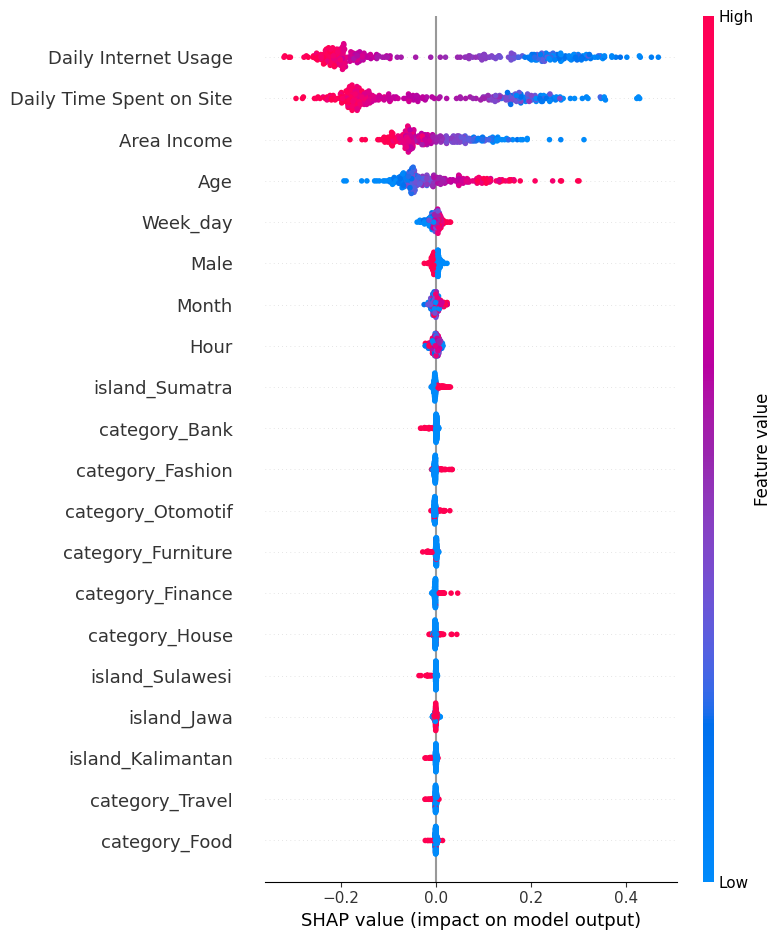

In [212]:
import shap

explainer = shap.TreeExplainer(final_model)
shap_values = explainer.shap_values(X_test)

# Check the shapes of shap_values and X_test
print("Shape of shap_values:", shap_values.shape)
print("Shape of X_test:", X_test.shape)

class_index = 1

#Summary plot of SHAP values
shap.summary_plot(shap_values[:,:,class_index], X_test)

## **Conclusion**

* From the SHAP plot, it's evident that the features influencing ad click predictions include Daily Internet Usage, Daily Time Spent on Site, Area Income, and Age.
* Daily Internet Usage, Daily Time Spent on Site, and Area Income exhibit a negative correlation with ad clicks (red color on the left side). This suggests that users who are less active on the internet and those with lower to middle incomes are more likely to click on ads.
* On the other hand, the Age feature shows a positive correlation, indicating that older users are more likely to click on ads.